#Ford GoBike System Data.

#By Faad Yusuf

#Introduction
Ford Go Bike is a regional public bicycle sharing system in California's San Francisco Bay Area in a partnership with Ford Motor Company. Ford GoBike consists of a fleet of bikes that can be unlocked in one station and returned in any other network station. Thus, this is ideal for one-way trips. These bikes are available for use thorughout the year and riders have access to all bikes in the network.

In [2]:
#Changing Directory
%cd /content/drive/MyDrive/Ford_bike-master

/content/drive/MyDrive/Ford_bike-master


In [3]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Wrangling

In [4]:
#Data import
df = pd.read_csv('bike_data.csv')
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [5]:
#Checking for dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#Checking for the summary statistics
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [7]:
#Checking for missing values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#Drop columns with null values
df.dropna(inplace=True)

##Checking for unique values for columns

In [9]:
#station_name
df.start_station_name.nunique(), df.end_station_name.nunique()

(329, 329)

In [10]:
#user_type
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [11]:
#member_gender
df.member_gender.unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [12]:
#bike_share_for_all_trip
df.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

#Data Prepocessing

In [13]:
#Convert start_time and end_time to date time format
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [14]:
#Convert duration in seconds to minutes
df['duration_min'] = (df['duration_sec'] / 60).astype(int)

In [15]:
#Extracting the start hour, end hour and day of the week from start time and end time
df['start_hour']= df.start_time.dt.hour
df['end_hour']= df.end_time.dt.hour

df['start_day'] = df.start_time.dt.day_name()
df['end_day'] = df.end_time.dt.day_name()

df['start_month'] = df.start_time.dt.month_name()
df['end_month'] = df.end_time.dt.month_name()

In [16]:
#Convert birth_year to integer
df['member_birth_year'] = df['member_birth_year'].astype(int)

In [17]:
#Convert object types to category
values = ['user_type', 'member_gender', 'bike_share_for_all_trip']
for cols in values:
  df[cols] = df[cols].astype('category')

In [18]:
#Convert year to age
df['member_age'] = 2020 - df['member_birth_year']

In [19]:
#Check the age statistics
df.member_age.describe()

count    174952.000000
mean         35.196865
std          10.118731
min          19.000000
25%          28.000000
50%          33.000000
75%          40.000000
max         142.000000
Name: member_age, dtype: float64

In [20]:
#Removing outlier from the age variable as maximum age is 144
print(len(df))
df = df[df['member_age'] <= 100]
print(len(df))

174952
174880


In [21]:
#Drop columns invaluable to the analysis
df.drop(columns=['start_time', 'end_time', 'member_birth_year', 'duration_sec'], axis=1, inplace=True)

<ipython-input-21-3d7bdd75a0eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['start_time', 'end_time', 'member_birth_year', 'duration_sec'], axis=1, inplace=True)


In [22]:
#Info of the cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174880 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   start_station_id         174880 non-null  float64 
 1   start_station_name       174880 non-null  object  
 2   start_station_latitude   174880 non-null  float64 
 3   start_station_longitude  174880 non-null  float64 
 4   end_station_id           174880 non-null  float64 
 5   end_station_name         174880 non-null  object  
 6   end_station_latitude     174880 non-null  float64 
 7   end_station_longitude    174880 non-null  float64 
 8   bike_id                  174880 non-null  int64   
 9   user_type                174880 non-null  category
 10  member_gender            174880 non-null  category
 11  bike_share_for_all_trip  174880 non-null  category
 12  duration_min             174880 non-null  int64   
 13  start_hour               174880 non-null  int32  

In [23]:
#Exporting the cleaned dataset as csv
df.to_csv('cleaned_bike_data.csv')

#Aims and Objectives
The aim of the project is to determine possible factors that contribute to increased usage of the bike sharing service.The
objectives of analyzing this dataset could include:

- **Understanding Usage Patterns:** Analyzing how often bikes are used, peak usage times, and popular routes.
- **User Demographics:** Examining the demographics of users (e.g., age, gender) to understand who is using the bike-sharing service.
- **Trip Duration Analysis:** Investigating the duration of trips to identify trends or outliers.
- **Station Popularity:** Identifying which stations are the most popular for starting and ending trips.
- **Seasonal Trends:** Analyzing how bike usage varies by day, month, or season.

#Features and Structure
The dataset has the following columns:
- start_station_id: Unique identifier for the starting station.
- start_station_name:Name of the starting station.        
- start_station_latitude: Latitude of the starting station.  
- start_station_longitude Longitude of the starting station.
- end_station_id: Unique identifier for the ending station.            
- end_station_name: Name of the ending station.       
- end_station_latitude: Latitude of the ending station.    
- end_station_longitude: Longitude of the starting station.    
- bike_id: Unique identifier for the bike used.                   
- user_type: Type of user (e.g., Customer or Casual, Subscriber or Member).                
- member_gender: Gender of the user.            
- bike_share_for_all_trip:  Indicates if the trip is part of a bike-sharing program for all.  
- duration_min: Duration of the trip in minutes.           
- start_hour: Hour of the day when the trip started.                  
- end_hour: Hour of the day when the trip ended.               
- start_day: Day of the week when the trip started.               
- end_day: Day of the week when the trip ended.                   
- start_month: Month when the trip started.               
- end_month: Month when the trip ended.                 
- member_age:  Age of the user, calculated from member_birth_year.    

##Structure
The dataset contains 174,880 rows and 20 columns, representing a substantial number of bike trips recorded different attributes related to the bike trips and users.
         

#Exploratory Data Analysis

##Univariate Analysis

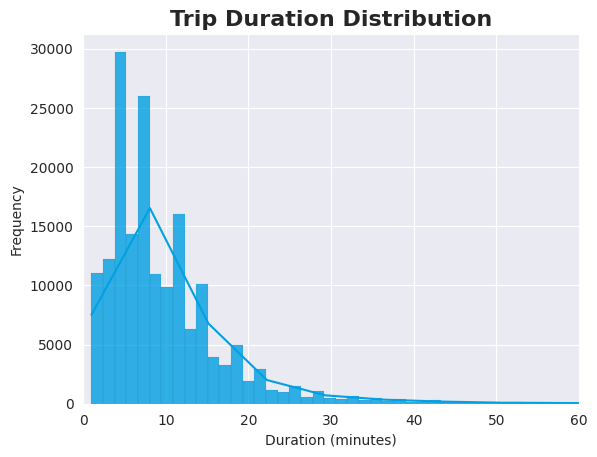

In [24]:
# Plotting duration distribution

sns.set_style("darkgrid")
brand_colors = ["#003399", "#00A0E2"] #Ford GoBike color

sns.histplot(df['duration_min'], bins=1000,
             kde=True, color=brand_colors[1], edgecolor='black',  alpha=0.8)
plt.title("Trip Duration Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.xlim(0, 60)
plt.show()


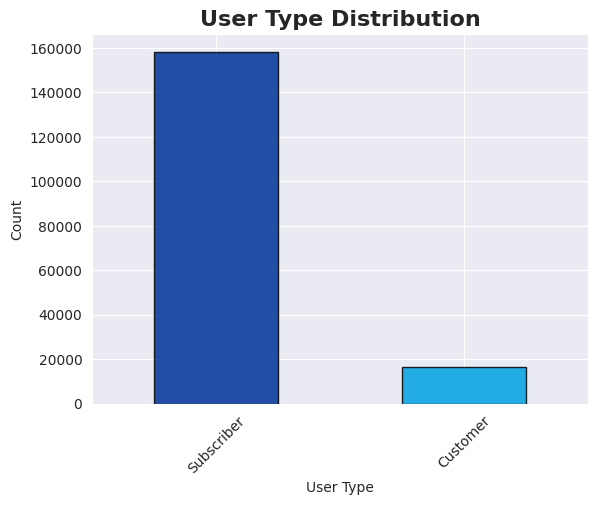

In [25]:
# User type distribution
df.user_type.value_counts().plot(kind='bar', color=brand_colors, edgecolor='black', alpha=0.85)
plt.title("User Type Distribution", fontsize=16, fontweight='bold')
plt.xlabel("User Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

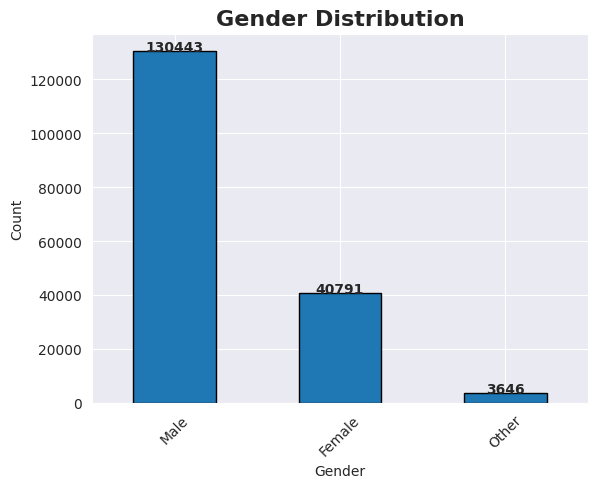

In [26]:
# Gender distribution
df['member_gender'].value_counts().plot(kind='bar', edgecolor='black')
plt.title("Gender Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Count")
# Add value labels on top of bars
for i, value in enumerate(df['member_gender'].value_counts()):
    plt.text(i, value + 100, str(value), ha='center', fontsize=10, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

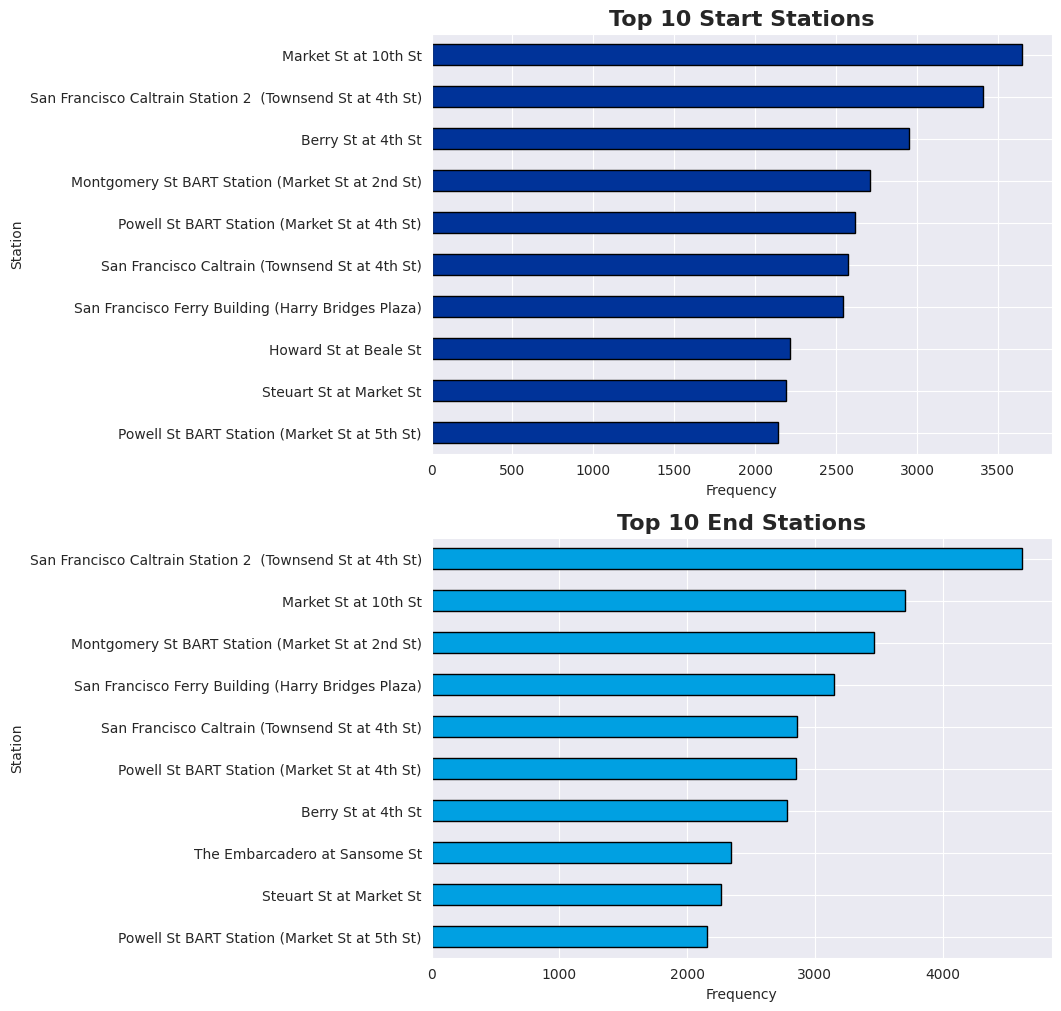

In [27]:
#Top 10 Start and end station
plt.figure(figsize=(8, 12))

plt.subplot(2,1,1)
df['start_station_name'].value_counts().head(10).sort_values().plot(kind='barh', color= brand_colors[0], edgecolor='black')
plt.title('Top 10 Start Stations', fontsize=16, fontweight='bold')
plt.ylabel('Station')
plt.xlabel('Frequency');

plt.subplot(2,1,2)

df['end_station_name'].value_counts().head(10).sort_values().plot(kind='barh', color= brand_colors[1], edgecolor='black')
plt.title('Top 10 End Stations', fontsize=16, fontweight='bold')
plt.ylabel('Station')
plt.xlabel('Frequency');

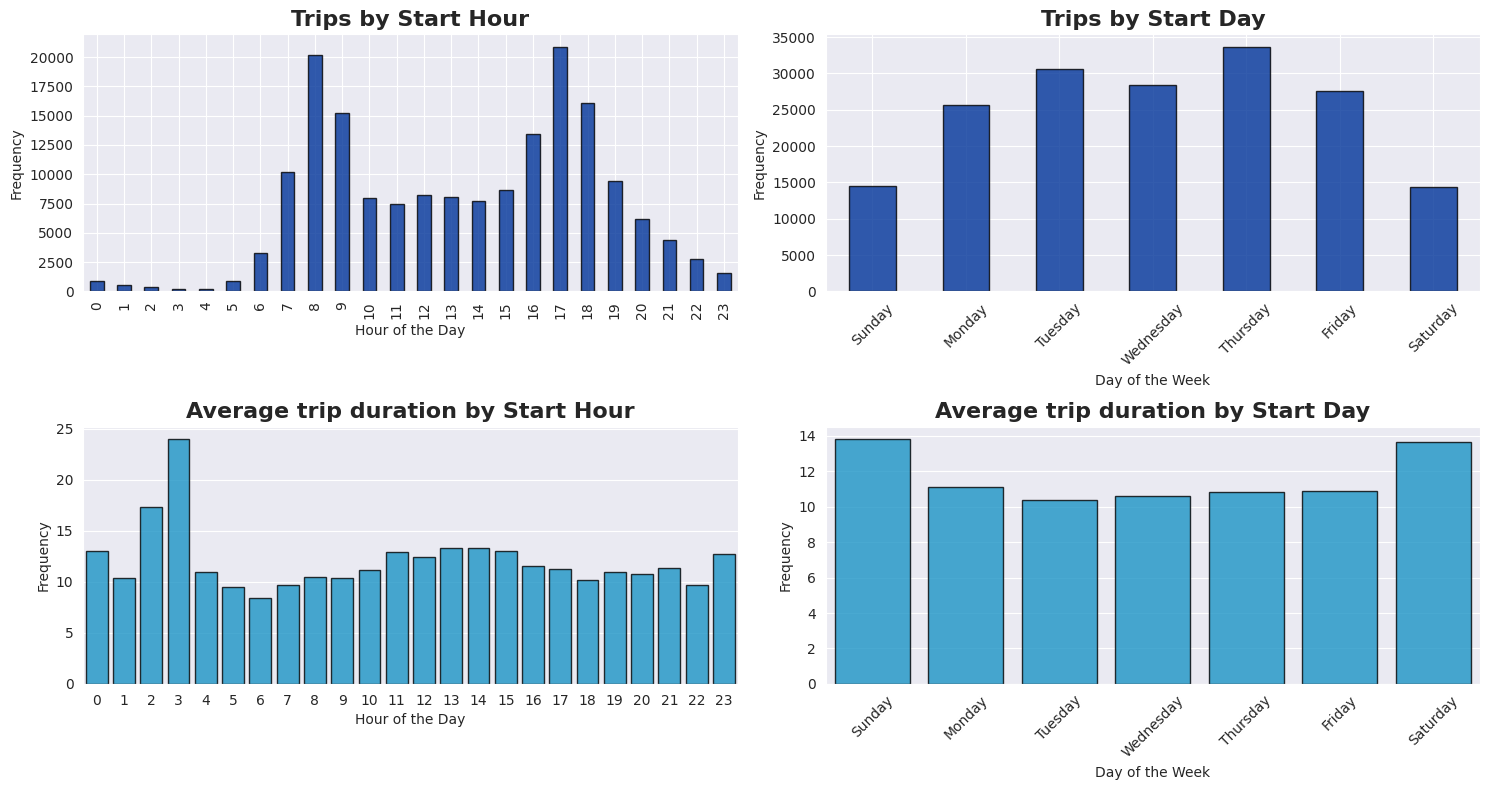

In [28]:
#Number of trips by hours and day of the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Convert 'start_day' to a categorical type with the specified order
df['start_day'] = pd.Categorical(df['start_day'], categories=day_order, ordered=True)
df['end_day'] = pd.Categorical(df['end_day'], categories=day_order, ordered=True)
#Plot
plt.figure(figsize=(15, 8))

plt.subplot(2,2,1)
df['start_hour'].value_counts().sort_index().plot(kind='bar', color=brand_colors[0], edgecolor='black', alpha=0.8)
plt.title('Trips by Start Hour', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency');

plt.subplot(2,2,2)
df['start_day'].value_counts().sort_index().plot(kind='bar', color=brand_colors[0], edgecolor='black', alpha=0.8)
plt.title('Trips by Start Day', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45);

plt.subplot(2,2,3)
sns.barplot(df, x=df['start_hour'], y=df['duration_min'],
            color=brand_colors[1], edgecolor='black', alpha=0.8, errorbar=None)
plt.title('Average trip duration by Start Hour', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency');

plt.subplot(2,2,4)
sns.barplot(df, x=df['start_day'], y=df['duration_min'],
            color=brand_colors[1], edgecolor='black', alpha=0.8, errorbar=None)
plt.title('Average trip duration by Start Day', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout();


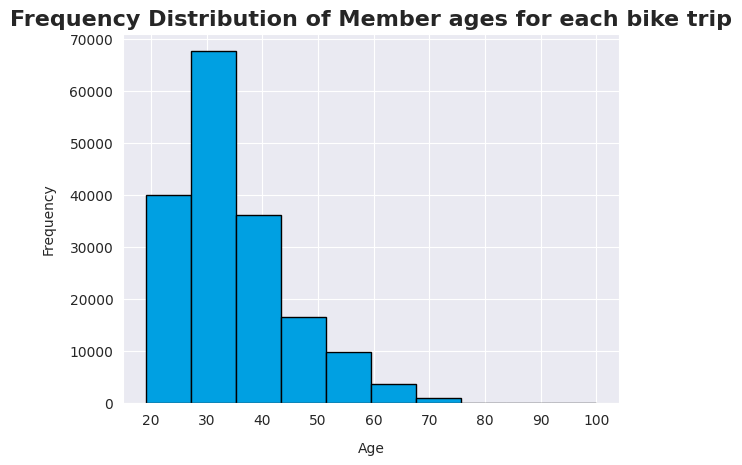

In [29]:
#Member Age distribution
plt.hist(df['member_age'], bins=10, color=brand_colors[1], edgecolor='black',)
plt.title('Frequency Distribution of Member ages for each bike trip', fontsize=16, fontweight='bold')
plt.xlabel('Age', labelpad=10)
plt.ylabel('Frequency', labelpad= 10);

##Bivariate Analysis

In [30]:
df['member_age'].groupby(df['member_gender']).agg(Average= 'mean', Youngest='min', Oldest='max')

<ipython-input-30-169d05afd766>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['member_age'].groupby(df['member_gender']).agg(Average= 'mean', Youngest='min', Oldest='max')


Average  Youngest  Oldest
member_gender                             
Female         34.194259        19      87
Male           35.416718        19     100
Other          36.877948        20      92

(0.0, 60.0)

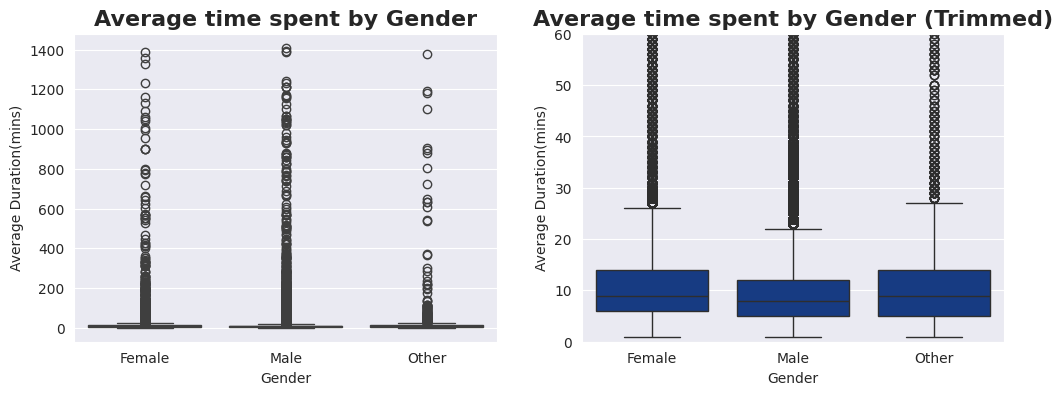

In [31]:
# Average duration (mins) spent on trips by different genders
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.member_gender, y=df.duration_min)
plt.title('Average time spent by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Average Duration(mins)')


plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.member_gender, y=df.duration_min, color=brand_colors[0], saturation=0.7)
plt.title('Average time spent by Gender (Trimmed)', fontsize=16, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Average Duration(mins)')
plt.ylim(0,60)

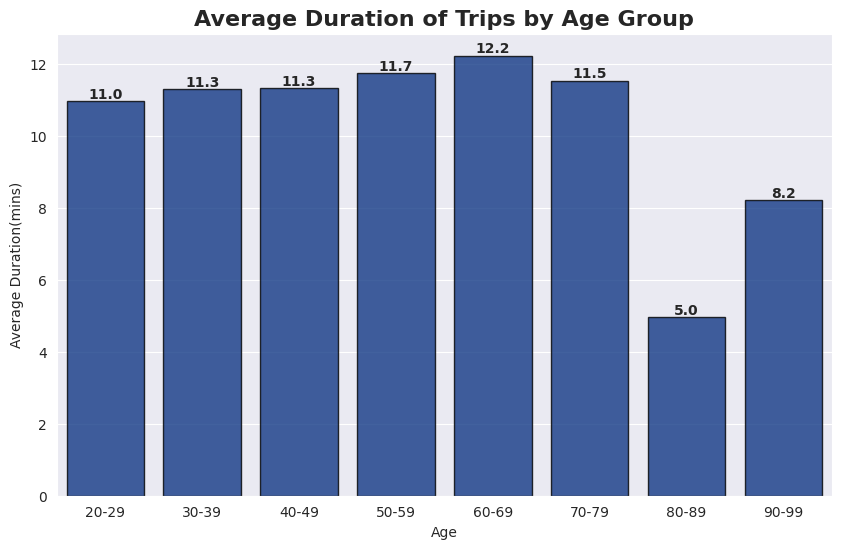

In [32]:
#Average duration spent by different age groups
'''
I will divide the different member_age into different age groups e.g. 10-19, 20-29 etc.
This creates a new column from the existing member_age

'''

labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

df['age_groups'] = pd.cut(df['member_age'], bins=[20, 30, 40, 50, 60, 70, 80, 90, 100], labels=labels)

df['age_groups'] = df['age_groups'].astype('category')

plt.figure(figsize=(10, 6))
ax=sns.barplot(data=df, x=df.age_groups, y=df.duration_min,
               color=brand_colors[0], edgecolor='black', alpha=0.8, errorbar=None)
# Add value labels on bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title('Average Duration of Trips by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Average Duration(mins)')
plt.show()

In [33]:
#Gender distribution by different user type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=df.member_gender, hue=df.user_type, palette=brand_colors, edgecolor='black')
plt.title('Gender Distribution by User Type', fontsize=14, fontweight='bold', pad=10)
plt.xlabel('Gender')
plt.ylabel('Frequency', labelpad=10)
plt.show()

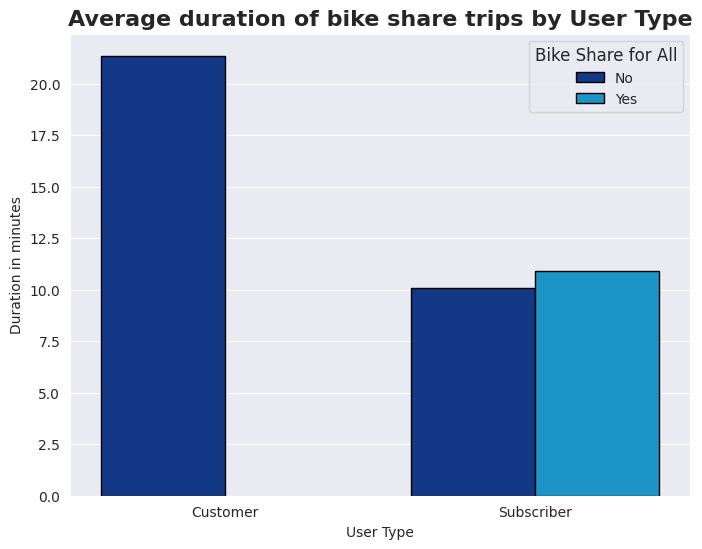

In [34]:
# Average duration of trips by user type
plt.figure(figsize=(8, 6))
sns.barplot(df, x=df.user_type, y=df.duration_min, hue=df.bike_share_for_all_trip,
            errorbar=None, palette=brand_colors, edgecolor="black")
plt.title('Average duration of bike share trips by User Type', fontsize=16, fontweight="bold")
plt.xlabel('User Type')
plt.ylabel('Duration in minutes')
plt.legend(title="Bike Share for All", loc="upper right", fontsize=10, title_fontsize=12)
plt.show()

##Correlation

In [35]:
#Correlation matrix
correlation = df[['duration_min', 'start_hour', 'end_hour']].corr()
print(correlation)

              duration_min  start_hour  end_hour
duration_min      1.000000    0.006123  0.003862
start_hour        0.006123    1.000000  0.982057
end_hour          0.003862    0.982057  1.000000


#Summary of EDA
##1.Trip Duration Analysis
- The majority of trips last under 60 minutes, indicating that most users use the service for short commutes rather than long rides.

- Customers tend to take longer trips compared to Subscribers, possibly because Subscribers are more likely to use the service for daily commuting.

- Bike Share for All Trips are only used by Subscribers only but only for short trips when compared to customer's commuting distance.

##2.User Demographics
- Subscribers make up the majority of users, suggesting that the service is popular among regular commuters.

- Males dominate user population, followed by females and a small proportion of "Other" gender users.

- Age-based analysis shows that the most active users fall within the 20-39 age group, with trip duration gradually decreasing as age increases.

##3.Station Popularity
- The top 10 most frequently used start and end stations are located in key urban areas, indicating high demand in business districts and transit hubs.

- Some stations appear in both the top start and end stations, suggesting they serve as key interchange points.

##4.Trip Patterns
- Trips peak during morning and evening rush hours, reinforcing the idea that Ford GoBike is used primarily for commuting.

- Weekday usage is significantly higher than weekend usage, further supporting the trend of work-related travel.

- Weekends tend to have slightly longer trips compared to weekdays, possibly due to leisure or social activities after work.

#Modelling

In [36]:
#Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [37]:
df_model = df.copy()
df_model.head()

start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   
5              93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   
5               37.770407              -122.391198           323.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

   end_station_longitude  bike_id   user_type  ... bike_share_for_all_trip  \
0            -122.402923     4902    Customer  ...                      No   
2            -122.404904     5905    Customer  ...                      No   
3            -122.444293     6638  Subscriber  ...                      No   
4            -122.248780     4898  Subscriber  ...                     Yes   
5            -122.405950     5200  Subscriber  ...                      No   

  duration_min  start_hour  end_hour  start_day end_day start_month end_month  \
0          869          17         8   Thursday  Friday    February     March   
2         1030          12         5   Thursday  Friday    February     March   
3          608          17         4   Thursday  Friday    February     March   
4           26          23         0   Thursday  Friday    February     March   
5           29          23         0   Thursday  Friday    February     March   

  member_age  age_groups  
0         36       30-39  
2         48       40-49  
3         31       30-39  
4         46       40-49  
5         61       60-69  

[5 rows x 21 columns]

In [38]:
#Drop columns not relevant for modelling
df_model.drop(columns=['start_station_id', 'start_station_name', 'bike_id', 'age_groups', 'end_day', 'end_month', 'end_station_id', 'end_station_name'], axis=1, inplace=True)

In [39]:
#Convert start of month to category
df_model['start_month']= df_model['start_month'].astype('category')

In [40]:
#Label Encoding for categorical variables
encoder = LabelEncoder()
cat_labels = ['user_type', 'member_gender', 'bike_share_for_all_trip', 'start_day', 'start_month']
for cat in cat_labels:
  df_model[cat]= encoder.fit_transform(df_model[cat])

In [41]:
#Defining X and y
X= df_model.drop(columns='bike_share_for_all_trip', axis=1)
y= df_model.bike_share_for_all_trip

In [42]:
#Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

len(X_train), len(y_train), len(X_test), len(y_test)

(139904, 139904, 34976, 34976)

In [43]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression Performance:
Accuracy: 0.9277790484903934
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     31557
           1       0.78      0.37      0.50      3419

    accuracy                           0.93     34976
   macro avg       0.86      0.68      0.73     34976
weighted avg       0.92      0.93      0.92     34976



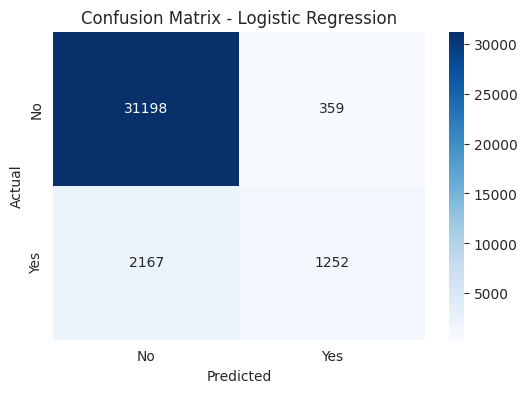

--------------------------------------------------
Random Forest Performance:
Accuracy: 0.9602584629460201
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     31557
           1       0.93      0.64      0.76      3419

    accuracy                           0.96     34976
   macro avg       0.95      0.82      0.87     34976
weighted avg       0.96      0.96      0.96     34976



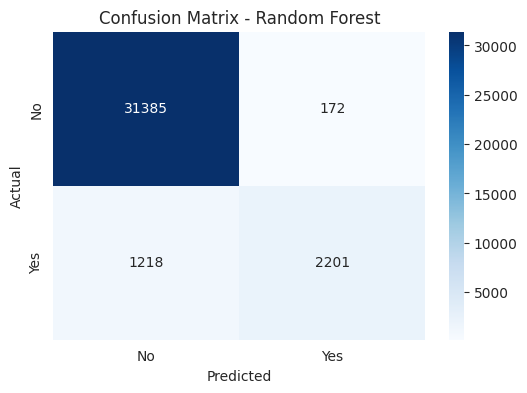

--------------------------------------------------
Gradient Boosting Performance:
Accuracy: 0.9360704483074108
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     31557
           1       0.91      0.38      0.54      3419

    accuracy                           0.94     34976
   macro avg       0.93      0.69      0.75     34976
weighted avg       0.93      0.94      0.92     34976



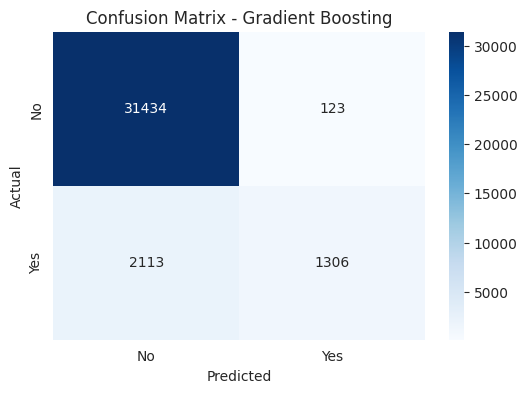

--------------------------------------------------


In [44]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, loss="log_loss")
}

# Train, predict, and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy and classification report
    print(f"{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("-" * 50)

##Summary of Model's Performance
###1. Logistic Regression:

Accuracy: 92.78%

- Struggles with recall for the positive class (1), meaning it misclassifies a significant number of actual positive cases as negative.

- Precision for class 1 is low (0.78), indicating a higher rate of false positives.

- The confusion matrix shows 2,167 false negatives, meaning it fails to correctly predict a significant number of positive cases.

###2. Random Forest:

Accuracy: 96.03% (highest among all models)

- Shows a significant improvement in recall for the positive class (1), capturing more actual positives.

- The confusion matrix has 1,218 false negatives, meaning it performs better in identifying positive cases.

- Precision is 0.93 for class 1, which is significantly better than logistic regression.

###3.Gradient Boosting (XGBoost):

Accuracy: 93.61%

- The recall for the positive class is better than logistic regression but lower than random forest.

- Has 2,113 false negatives, indicating it still struggles to capture all positive cases.

- Precision for class 1 is good, but it doesn’t perform as well as random forest.

##Feature Importance

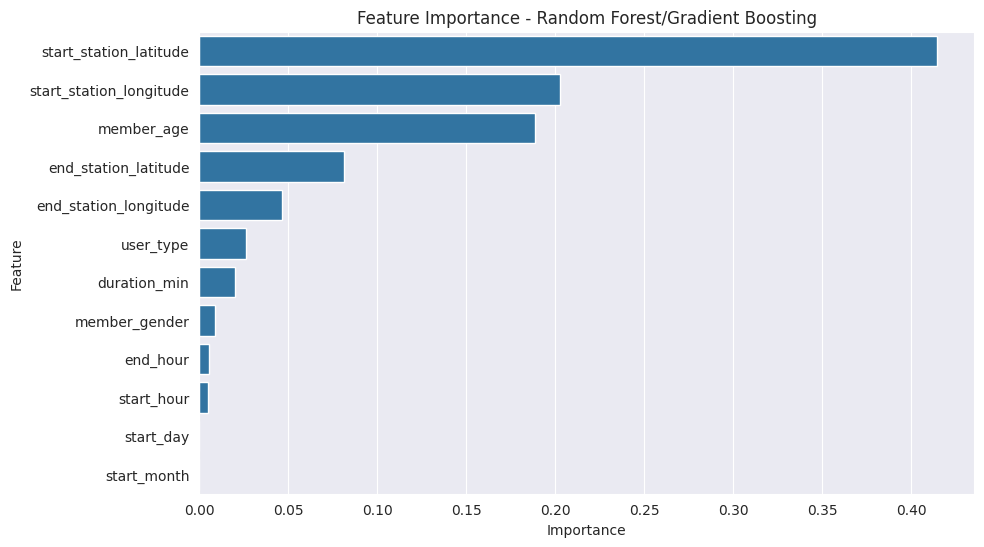

In [45]:
# Feature importance for Random Forest
feature_names = df_model.drop('bike_share_for_all_trip', axis=1).columns.tolist()
feature_importance= pd.DataFrame({'Feature': feature_names, 'Gini Importance':model.feature_importances_}).sort_values('Gini Importance', ascending=False)
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Gini Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance - Random Forest/Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##Key Takeaways
- Random Forest is the best model in terms of accuracy and balance.
- Logistic Regression struggles with recall, leading to many false negatives.
- Gradient Boosting does better than Logistic Regression but still has low recall for class 1.

##Next Steps for Improvement
- Hyperparameter tuning (Using GridSearchCV or RandomizedSearchCV to improve performance.).
- Handling class imbalance (e.g., oversampling minority class with SMOTE).
- Other models (XGBoost, CatBoost, or Neural Networks) for comparison
- Additional Feature Engineering